<a href="https://colab.research.google.com/github/asosam91/SisDist2/blob/master/SistDist2_S3_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import sqrt
from dask import delayed

In [0]:
def f(z):
  return sqrt(z+4)

In [0]:
def g(y):
  return y-3

In [0]:
def h(x):
  return x ** 2

In [9]:
 f(g(h(4)))

4.123105625617661

In [0]:
data =[1, 2, 3, 4, 5]

In [11]:
%%time
[ f(g(h(x))) for x in data]

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 14.8 µs


[1.4142135623730951,
 2.23606797749979,
 3.1622776601683795,
 4.123105625617661,
 5.0990195135927845]

la lista anterior se genera secuencialmente, como la podemos generar paralela


In [0]:
x = 4
y = delayed(h)(x)
z = delayed(g)(y)
w = delayed(f)(z)

In [14]:
print(w)

Delayed('f-ed49e247-217f-467d-92fa-f1f7bd36b709')


In [16]:
w.compute()

4.123105625617661

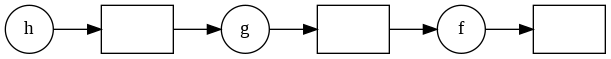

In [18]:
w.visualize(rankdir='LR')




In [27]:
data

[1, 2, 3, 4, 5]

In [0]:
output = []
for x in data:
  a = incrementa(x)
  b = dobla(x)
  c = suma(a,b)
  output.append(c)

In [0]:
total = sum(output)

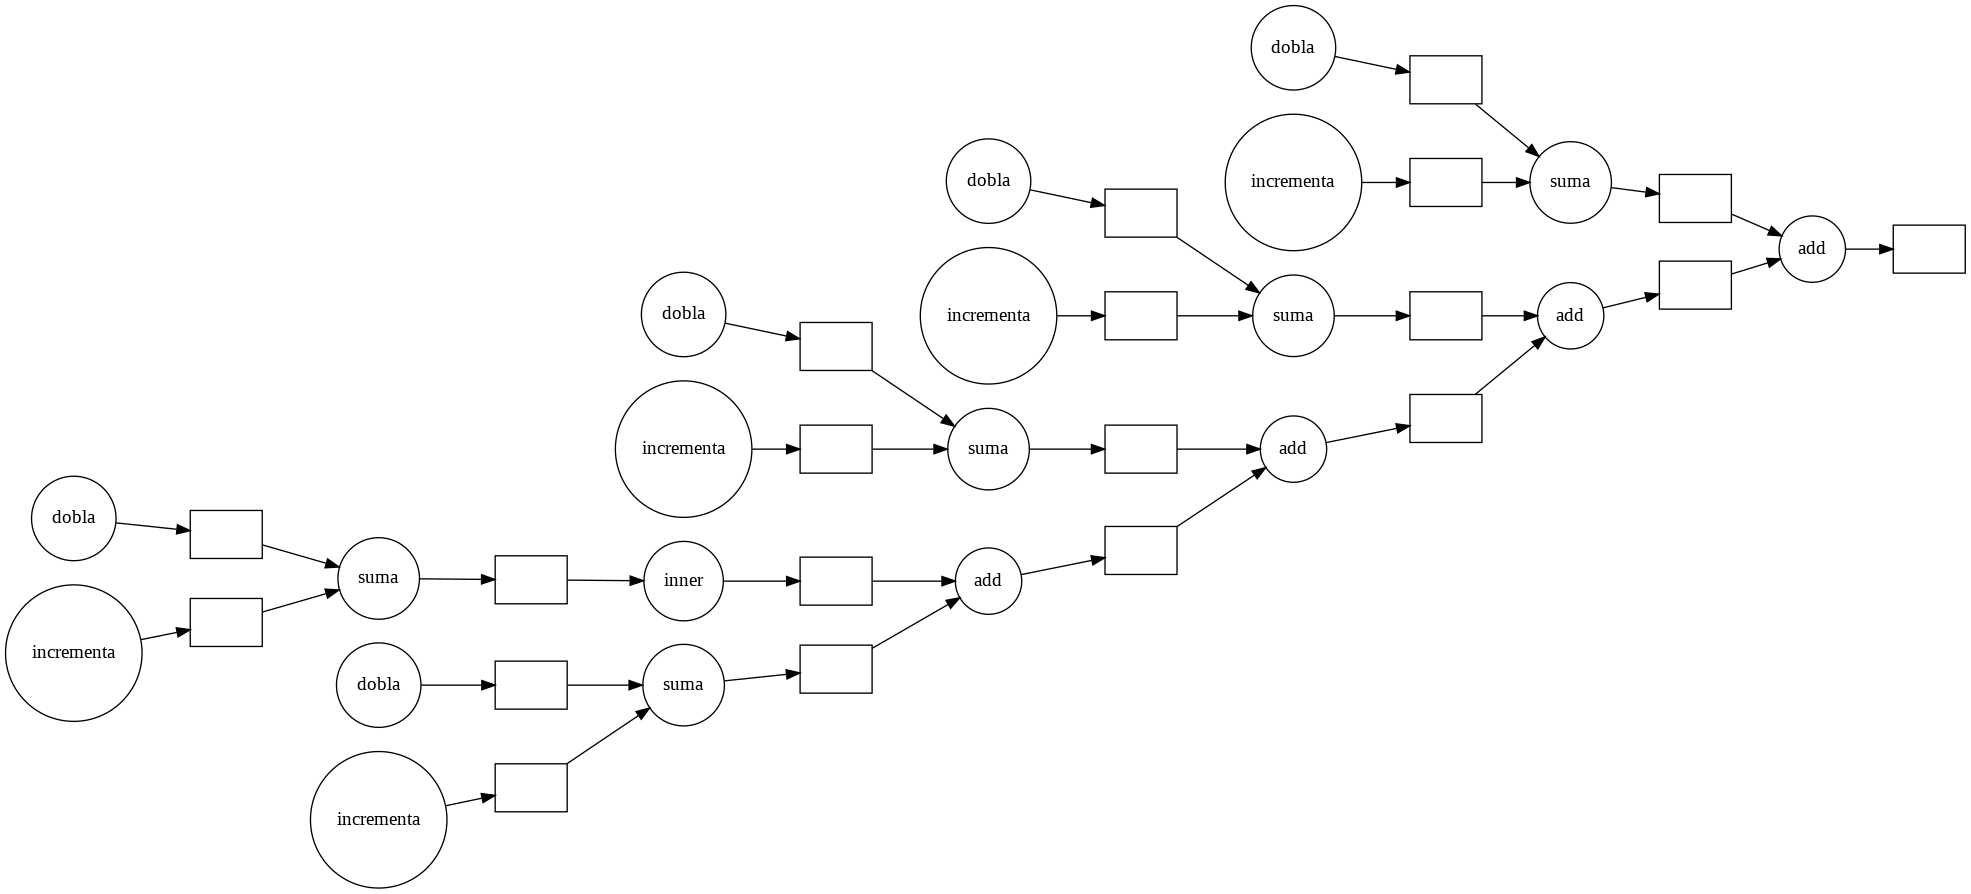

In [32]:
total.visualize(rankdir='LR')


In [34]:
%%time
total.compute()

CPU times: user 4.25 ms, sys: 756 µs, total: 5 ms
Wall time: 4.84 ms


50

In [0]:
#@delayed
def incrementa(x):
  return x +1

#@delayed
def dobla(x):
  return 2 * x

#@delayed
def suma(x, y):
  return x+y


In [42]:
%%time
a = incrementa(1)
b = dobla(2)
suma(a,b)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 15.3 µs


In [39]:
 %%time
a = delayed(incrementa)(1)
b = delayed(dobla)(2)
c = delayed(suma)(a,b)

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 2.25 ms


In [41]:
%%time
c.compute()

CPU times: user 3.18 ms, sys: 0 ns, total: 3.18 ms
Wall time: 3.97 ms


6

In [0]:
from time import sleep
def inc(x):
  sleep(1)
  return x +1

In [52]:
%%time
res = []
for x in data:
  y = inc(x)
  res.append(y)
total = sum(res)

CPU times: user 6.17 ms, sys: 514 µs, total: 6.68 ms
Wall time: 5 s


In [53]:
# en paralelo
%%time 
res = []
for x in data:
  y = delayed(inc)(x)
  res.append(y)
total = delayed(sum)(res)
total.compute()

CPU times: user 5.84 ms, sys: 3.88 ms, total: 9.72 ms
Wall time: 3.01 s


In [0]:
import os 

plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/' + plantilla
urls = (plantillaURL.format(y) for y in range(1,4))
for url in urls:
  os.system(url)

In [0]:
import pandas as pd

In [0]:
@delayed
def cuentaViajesTardado(df):
  df['duracion'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  viajeTardado= df.duracion > 1200
  resultDicc = {'n_long': [sum(viajeTardado)],
               'n_tota': [len(df)]}
  return pd.DataFrame(resultDicc)
@delayed
def abre_archivo(nombre):
  return pd.read_csv(nombre, parse_dates=[1,2])

In [0]:
archivos = [plantilla.format(k)for k in range (1,4)]

In [0]:
totales = [cuentaViajesTardado(abre_archivo(archivo)) for archivo in archivos]

In [0]:
semi_anuales=sum(totales)

In [66]:
%%time
semi_anuales.compute()

CPU times: user 1min 36s, sys: 8.62 s, total: 1min 45s
Wall time: 1min 20s


,n_long,n_tota
0,4942465,26682326


In [0]:
#compara el calculo de la celda anterior con los de la semana pasada 

## quitar delyed en las funciones y totale aue sea 

# arreglos o matrices usando dask

In [0]:
import numpy as np


In [0]:
a = np. random.rand(10000)

In [69]:
print (a.shape, a.dtype , a.nbytes)

(10000,) float64 80000


In [70]:
a.sum()

4964.083668601356

In [71]:
a.mean()

0.4964083668601356

In [0]:
import dask.array as da


In [0]:
a_dask = da.from_array(a, chunks = len(a)//3)

In [107]:
a_dask.chunks

((3333, 3333, 3333, 1),)

In [0]:
n_chunks = 8
chunk_size = len(a) //n_chunks
result = 0

In [109]:
%%time
for k in range(n_chunks):
  offset = k*chunk_size
  a_chunk = a[offset:offset+chunk_size]
  result += a_chunk.sum()
  
result

CPU times: user 0 ns, sys: 704 µs, total: 704 µs
Wall time: 527 µs


In [110]:
%%time
a.sum()

CPU times: user 617 µs, sys: 0 ns, total: 617 µs
Wall time: 1.01 ms


4964.083668601356

In [0]:
result_dask = a_dask.sum()


In [112]:
%%time
result_dask.compute()

CPU times: user 5.1 ms, sys: 942 µs, total: 6.05 ms
Wall time: 8.21 ms


4964.083668601356

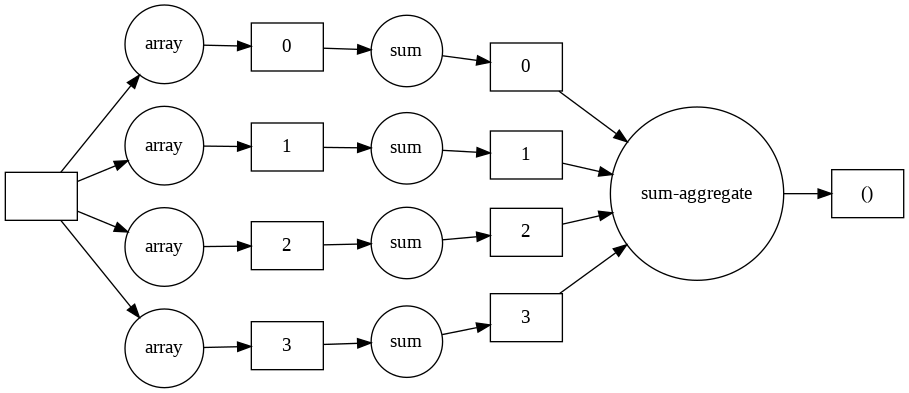

In [113]:
result_dask.visualize(rankdir='LR')

medir el tiempo d eocmputo dobre arrelgos

In [115]:
!wget https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

--2019-05-21 18:21:13--  https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-osc.org (www.gw-osc.org)... 131.215.125.179
Connecting to www.gw-osc.org (www.gw-osc.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5 [following]
--2019-05-21 18:21:14--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.125.179
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/ [following]
--2019-05-21 18:21:15--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/
Reusing existing connection t

In [0]:
!cp H-H1_LOSC_4_V1-815411200-4096.hdf5 LIGO_data.hdf5

In [0]:
import h5py, time

In [123]:
datos = h5py.File('./LIGO_data.hdf5')
type(datos)

h5py._hl.files.File

In [124]:
for key in datos.keys():
  print(key)

meta
quality
strain


In [0]:
with h5py.File('./LIGO_data.hdf5') as dset:
  strain = dset['strain']['Strain'][:]

In [127]:
strain.shape

(16777216,)

In [0]:
strain_dask8 = da.from_array(strain, chunks = strain.shape[0]//8)

In [134]:
ti = time.time()
promedio8 = strain_dask8.mean().compute()
tf = time.time()
print("Tiempo transcurrido: {} ms".format((tf-ti)*1000))

Tiempo transcurrido: 61.42139434814453 ms


#tarea
1. medir el tiempo de ejecucion anterior usando como chunks del arreglo de dask 2,4,8,16,32 y comparar con los mismos pero de usando nympy

In [135]:
strain_dask8.chunks


((2097152, 2097152, 2097152, 2097152, 2097152, 2097152, 2097152, 2097152),)